In [3]:
import pathlib

data_dir = r"C:\Users\kurma\Downloads\Rice_Image_Dataset"  # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('C:/Users/kurma/Downloads/Rice_Image_Dataset')

In [4]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]


In [5]:
%pip install numpy==1.22.4 h5py==3.8.0 --force-reinstall --upgrade --user


  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)
  Using cached h5py-3.8.0-cp38-cp38-win_amd64.whl (2.7 MB)Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kurma\\AppData\\Roaming\\Python\\Python38\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [6]:
from pathlib import Path
import cv2

data_dir = Path(r"C:\Users\kurma\Downloads\Rice_Image_Dataset")  # Replace with actual path
arborio_dir = data_dir / "Arborio"

if not arborio_dir.exists():
    print(f"Folder does not exist: {arborio_dir}")
else:
    image_paths = [f for f in arborio_dir.iterdir() if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]
    
    if not image_paths:
        print("No image files found in Arborio folder.")
    else:
        img = cv2.imread(str(image_paths[0]))
        if img is not None:
            print("Image shape:", img.shape)
        else:
            print("cv2.imread failed to read the image.")


Image shape: (250, 250, 3)


In [7]:
from pathlib import Path

# Point this to your dataset directory
data_dir = Path("path/to/rice_dataset")

# Define paths for each class
arborio    = list((data_dir / "arborio").glob("*.*"))
basmati    = list((data_dir / "basmati").glob("*.*"))
ipsala     = list((data_dir / "ipsala").glob("*.*"))
jasmine    = list((data_dir / "jasmine").glob("*.*"))
karacadag  = list((data_dir / "karacadag").glob("*.*"))

# Now you can safely create the dictionaries
df_images = {
    'arborio'   : arborio,
    'basmati'   : basmati,
    'ipsala'    : ipsala,
    'jasmine'   : jasmine,
    'karacadag' : karacadag
}

df_labels = {
    'arborio'   : 0,
    'basmati'   : 1,
    'ipsala'    : 2,
    'jasmine'   : 3,
    'karacadag' : 4
}


In [8]:
# Contains the images path
df_images = {
    'arborio'   : arborio,
    'basmati'   : basmati,
    'ipsala'    : ipsala,
    'jasmine'   : jasmine,
    'karacadag' : karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio'   : 0,
    'basmati'   : 1,
    'ipsala'    : 2,
    'jasmine'   : 3,
    'karacadag' : 4
}


In [9]:
X, y = [], []  # X = images, y = labels

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))  # Read the image
        resized_img = cv2.resize(img, (224, 224))  # Resize image to 224x224
        X.append(resized_img)  # Add image to feature list
        y.append(df_labels[label])  # Add corresponding label

import numpy as np  # ✅ Make sure NumPy is imported

# Standardizing the pixel values
X = np.array(X)
X = X / 255.0
y = np.array(y)



In [10]:
from pathlib import Path

data_dir = Path(r"C:\Users\kurma\Downloads\Rice_Image_Dataset")  # <-- replace this with your dataset folder

df_images = {}
for category_dir in data_dir.iterdir():
    if category_dir.is_dir():
        images = list(category_dir.glob("*.*"))
        print(f"Found {len(images)} images in {category_dir.name}")
        df_images[category_dir.name.lower()] = images  # lowercase keys

df_labels = {
    'arborio'   : 0,
    'basmati'   : 1,
    'ipsala'    : 2,
    'jasmine'   : 3,
    'karacadag' : 4
}

# Now try again building X, y:
X = []
y = []

for category, images in df_images.items():
    label = df_labels.get(category)
    if label is None:
        print(f"Warning: label not found for category {category}")
        continue
    for img_path in images:
        X.append(str(img_path))
        y.append(label)

print(len(X), len(y))



Found 15000 images in Arborio
Found 15000 images in Basmati
Found 15000 images in Ipsala
Found 15000 images in Jasmine
Found 15000 images in Karacadag
75000 75000


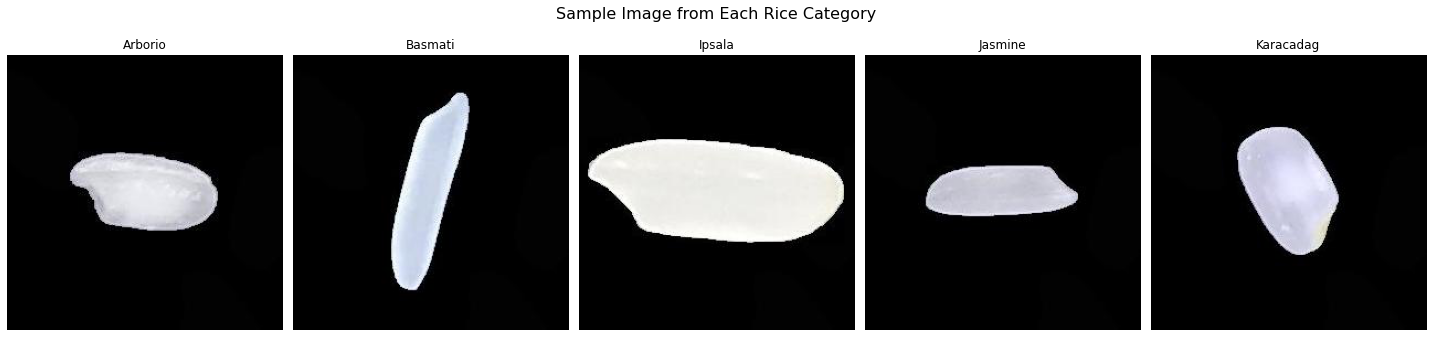

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Step 1: Build df_images
data_dir = Path(r"C:\Users\kurma\Downloads\Rice_Image_Dataset")  # Replace this with your actual dataset path
df_images = {
    category.name: list(category.glob("*.*"))
    for category in data_dir.iterdir() if category.is_dir()
}

# Step 2: Plot sample image from each category
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))
fig.suptitle("Sample Image from Each Rice Category", fontsize=16)

categories = list(df_images.keys())

for i, category in enumerate(categories[:5]):  # Make sure only 5 axes are used
    if df_images[category]:  # Check if list is not empty
        img_path = str(df_images[category][0])
        image = mpimg.imread(img_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(category)
    else:
        axes[i].axis('off')
        axes[i].set_title(f"{category}\n(No image found)")

plt.tight_layout()
plt.show()


In [12]:
import tensorflow as tf
import tensorflow_hub as hub


In [13]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'  # MobileNetv4 link
mobile_net = hub.KerasLayer(
    mobile_net, input_shape=(224, 224, 3), trainable=False)  # Removing the last layer


In [14]:
from tensorflow import keras
import tensorflow_hub as hub

mobile_net_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobile_net = hub.KerasLayer(mobile_net_url, input_shape=(224, 224, 3), trainable=False)

num_label = 5  # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [16]:
import tensorflow as tf
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Prepare the data
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_data = datagen.flow_from_directory(
    r"C:\Users\kurma\Downloads\Rice_Image_Dataset",
    target_size=(96, 96),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)
train_data.samples = 1000

val_data = datagen.flow_from_directory(
    r"C:\Users\kurma\Downloads\Rice_Image_Dataset",
    target_size=(96, 96),
    batch_size=16,
    class_mode='sparse',
    subset='validation'
)

# 2. Load MobileNet feature extractor
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/5"
feature_extractor_layer = hub.KerasLayer(mobilenet_url, input_shape=(96, 96, 3), trainable=False)

# 3. Create model
num_classes = len(train_data.class_indices)

model = keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes)  # no activation (raw logits)
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 5. Train the model
history = model.fit(train_data, epochs=1, validation_data=val_data)

# 6. Save the model
model.save("model.h5")
print("✅ model.h5 saved successfully.")


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
1875/1875 [==============================] - 1284s 678ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0290 - val_accuracy: 0.9906


C:\Users\kurma\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ model.h5 saved successfully.


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

# Load model with custom KerasLayer
model = load_model("model.h5", custom_objects={'KerasLayer': hub.KerasLayer})

# Data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load only a small number of images for testing (e.g., 100 samples)
test_data = datagen.flow_from_directory(
    r"C:\Users\kurma\Downloads\Rice_Image_Dataset",
    target_size=(96, 96),
    batch_size=16,
    class_mode='sparse',
    shuffle=False
)

# Limit evaluation to a few steps (e.g., only 100 images → steps = 100 / batch_size)
steps_to_test = 100 // 16  # = 6 steps approx

# Evaluate on limited test samples
loss, accuracy = model.evaluate(test_data, steps=steps_to_test)

print(f"✅ Accuracy on small test set: {accuracy * 100:.2f}%")
print(f"📉 Loss on small test set: {loss:.4f}")


Found 75000 images belonging to 5 classes.
6/6 [==============================] - 4s 377ms/step - loss: 0.0361 - accuracy: 0.9792
✅ Accuracy on small test set: 97.92%
📉 Loss on small test set: 0.0361


In [1]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load sample MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a simple model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)  # 10 classes (digits 0-9)
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1)

# Predict
y_pred = model.predict(x_test, batch_size=64)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_labels))


11490434/11490434 [==============================] - 5s 0us/step
Epoch 1/3
938/938 [==============================] - 4s 3ms/step - loss: 2.4149 - accuracy: 0.5203
Epoch 2/3
938/938 [==============================] - 3s 3ms/step - loss: 2.2875 - accuracy: 0.5000
Epoch 3/3
157/157 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.02      0.05       980
           1       1.00      0.00      0.01      1135
           2       0.30      0.31      0.31      1032
           3       0.14      0.04      0.06      1010
           4       0.86      0.23      0.37       982
           5       0.22      0.41      0.29       892
           6       0.31      0.82      0.45       958
           7       0.98      0.09      0.17      1028
           8       0.19      0.77      0.30       974
           9       0.48      0.01      0.03      1009

    accuracy                           0.26     10000
   macro avg       0.5

In [3]:
!pip install plotly


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generator with normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data from directory
train_data = datagen.flow_from_directory(
    r"C:\Users\kurma\Downloads\Rice_Image_Dataset",         # path to your image dataset
    target_size=(96, 96),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

# Load validation data
val_data = datagen.flow_from_directory(
    r"C:\Users\kurma\Downloads\Rice_Image_Dataset",
    target_size=(96, 96),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [11]:
from plotly.offline import init_notebook_mode
import plotly.express as px
import pandas as pd

# Enable Plotly for offline usage
init_notebook_mode(connected=True)

# Simulated 'history' object for demonstration purposes
# Replace this with: history = model.fit(...) from your actual training
history = {
    'accuracy': [0.83, 0.96, 0.97, 0.975, 0.978, 0.98, 0.985, 0.987, 0.988, 0.989],
    'val_accuracy': [0.94, 0.96, 0.955, 0.963, 0.966, 0.967, 0.971, 0.972, 0.97, 0.968]
}

# Convert training history to a DataFrame
acc = pd.DataFrame({
    'train': history['accuracy'],
    'val': history['val_accuracy']
})

# Plot the line chart with Plotly
fig = px.line(
    acc,
    x=acc.index,
    y=['train', 'val'],
    title='Training and Evaluation Accuracy per Epoch',
    labels={'value': 'Accuracy', 'index': 'Epoch', 'variable': 'Dataset'},
    markers=True
)

fig.show()


In [16]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

# Load the model with the custom KerasLayer
model = load_model(r"C:\Users\kurma\OneDrive\Desktop\prasha project\model.h5",
                   custom_objects={'KerasLayer': hub.KerasLayer})



In [25]:
import cv2
import numpy as np

# Define class labels (update to your classes)
class_names = ['Basmati', 'Jasmine', 'Arborio', 'Ipsala', 'Karacadag']

# Load and preprocess the image
a1 = cv2.imread(r"C:\Users\kurma\Downloads\Rice_Image_Dataset\Basmati\basmati (10).jpg")
a1 = cv2.resize(a1, (96, 96))  # Match the model's expected input size
a1 = np.array(a1) / 255.0
a1 = np.expand_dims(a1, axis=0)

# Predict
pred = model.predict(a1)
pred_class = np.argmax(pred)
pred_label = class_names[pred_class]

print(f"Predicted Class: {pred_label}")
print(pred_class)


1/1 [==============================] - 0s 23ms/step
Predicted Class: Jasmine
1


In [21]:
# Predicted class index (example)
pred = 0  # replace this with your actual prediction output

# Define labels
df_labels = {
    "Basmati": 0,
    "Jasmine": 1,
    "Arborio": 2,
    "Ipsala": 3,
    "Karacadag": 4
}

# Print predicted class name
for i, j in df_labels.items():
    if pred == j:
        print("Predicted class label:", i)


Predicted class label: Basmati


In [27]:
model.save("rice_model.keras")
